### API Ecobici

In [1]:
import pandas as pd 
import datetime 
import os

import json
import requests


In [2]:
# client_id = 'xxxxxxxxx'
# client_secret = 'yyyyyyyyyy'


---

Revisar documentación de ecobici

Consultar la siguiente liga para obtener el access token

In [3]:
#https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=xxxxxxx&client_secret=yyyyyyy&grant_type=client_credentials

Regresará la siguiente cadena con el token de acceso. Usarlo para consultar

{"access_token":"zzzzzzzzz","expires_in":3600,"token_type":"bearer","scope":null,"refresh_token":"zzzzzzzzz"}

El token tiene una duración de 1 hr.

In [4]:
#token = 'NDg4YjkwNDg5ZDIwODU3Yzk2NWZkZjc4MTEzZDBjYjU2NGJlYTZkZGRmYjI5MmQzYjEwNDU4MjM0YmNkMjIyMA'

---

In [3]:
url0 = 'https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=' + client_id + '&client_secret=' + client_secret + '&grant_type=client_credentials'

In [4]:
url0

'https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=2439_2xrz9y3qf2kgoc8s8w0o8o44wg08osc4s00ocsw0cwgwo0wk4k&client_secret=56s1i488mhc8kg4scc0cwkgkk0gsw4oswggcws4scoscos4k0g&grant_type=client_credentials'

In [5]:
response_token = requests.get(url0)

In [6]:
response_token.json()

{'access_token': 'MjAwMDJjNWRjMWZhYmZhODY0MzU4MmE5ODY1YTU3NTRiNmZiNjEwNzcyYmIyNmMwZmU5M2M5OGM4Zjg4MjlkNg',
 'expires_in': 3600,
 'token_type': 'bearer',
 'scope': None,
 'refresh_token': 'OGFiODM5NzA4MGEwN2U1NzIxY2E5NmRjYzE5ZDg3MTJkN2NmZTYxMTBmMmFmMjhjMDJkMWE3NjYzNTBlNWY3ZQ'}

In [7]:
response_token.json().keys()

dict_keys(['access_token', 'expires_in', 'token_type', 'scope', 'refresh_token'])

In [8]:
token = response_token.json()['access_token']
token

'MjAwMDJjNWRjMWZhYmZhODY0MzU4MmE5ODY1YTU3NTRiNmZiNjEwNzcyYmIyNmMwZmU5M2M5OGM4Zjg4MjlkNg'

---

**Obtener listado de estaciones disponibles**

In [11]:
#help(requests.get)

Agregar el token dentro de la cadena

In [9]:
url1 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations.json?access_token=' + token 

In [10]:
response_listado_estaciones = requests.get(url1)

inspeccionar los datos

In [11]:
type(response_listado_estaciones.text)

str

In [12]:
type(response_listado_estaciones.json())

dict

Revisar las llaves del diccionario

In [13]:
response_listado_estaciones.json().keys()

dict_keys(['stations'])

In [14]:
len(response_listado_estaciones.json()['stations'])

479

In [15]:
response_listado_estaciones.json()['stations'][0].keys()

dict_keys(['id', 'name', 'address', 'addressNumber', 'zipCode', 'districtCode', 'districtName', 'altitude', 'nearbyStations', 'location', 'stationType'])

In [19]:
# response_listado_estaciones.text

In [18]:
# Inspeccionar los datos
# print(json.dumps(response_listado_estaciones.json(), indent = 4))

Así se ve el resultado de la línea anterior de código. No se ejecutó porque el resultado es muy extenso.

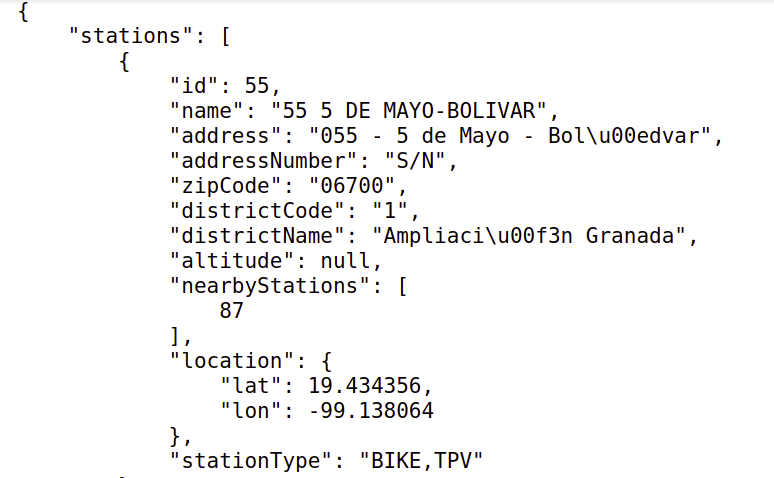

**obtener disponibilidad de estaciones**

Guardar en un objeto la fecha y hr del sistema para tener identificada la hr de consulta

In [19]:
fecha_actual = datetime.date.today()
now = datetime.datetime.now()

In [20]:
anio = fecha_actual.isocalendar()[0]
semana = fecha_actual.isocalendar()[1]

In [21]:
mes = now.month
dia = now.day

hora = now.hour
minuto = now.minute
segundo = now.second

In [24]:
print(now)

2022-09-30 20:08:51.029855


Definir url de consulta

In [22]:
#url2 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations/status.json?access_token=NDg4YjkwNDg5ZDIwODU3Yzk2NWZkZjc4MTEzZDBjYjU2NGJlYTZkZGRmYjI5MmQzYjEwNDU4MjM0YmNkMjIyMA'
url2 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations/status.json?access_token=' + token

In [23]:
response_disponibilidad_estaciones = requests.get(url2)

Inspeccionar los datos

In [24]:
response_disponibilidad_estaciones.json().keys()

dict_keys(['stationsStatus'])

In [25]:
len(response_disponibilidad_estaciones.json()['stationsStatus'])

429

In [26]:
response_disponibilidad_estaciones.json()['stationsStatus'][0].keys()

dict_keys(['id', 'status', 'availability'])

In [27]:
# Formato amigable para el lector
# print(json.dumps(response_disponibilidad_estaciones.json(), indent = 4))

Así se ve el resultado de la línea anterior de código. No se ejecutó porque el resultado es muy extenso.

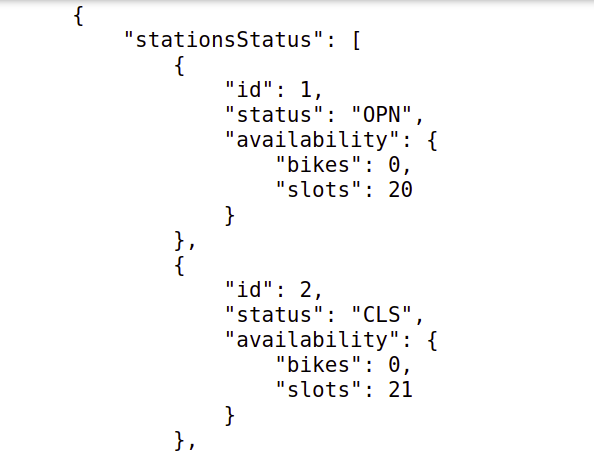

**Guardar las consultas**

In [28]:
os.getcwd()

'/home/leonardo/Documentos/Acatlan/Repositorios/datos_masivos_II_2022/datos/Ecobici'

Listado de estaciones

In [29]:
file1 = "datos/listado_estaciones_ecobici_" + str(anio) + "_semana_" + str(semana) + ".json"
file1

'datos/listado_estaciones_ecobici_2022_semana_40.json'

In [30]:
out_file1 = open(file1, "w")    
json.dump(response_listado_estaciones.json(), out_file1, indent = 4)  
out_file1.close()  

Disponibilidad

In [31]:
file2 = "datos/disponibilidad_estaciones_ecobici_anio" + str(anio) + "_mes" + str(mes) + "_dia" + str(dia) + "_hr" + str(hora) + "_min" + str(minuto) + ".json"
file2

'datos/disponibilidad_estaciones_ecobici_anio2022_mes10_dia6_hr14_min19.json'

In [32]:
out_file2 = open(file2, "w")    
json.dump(response_disponibilidad_estaciones.json(), out_file2, indent = 4)  
out_file2.close()  

---

**Estructurar los datos en formato tabla**

In [33]:
response_listado_estaciones.json()['stations'][0].keys()

dict_keys(['id', 'name', 'address', 'addressNumber', 'zipCode', 'districtCode', 'districtName', 'altitude', 'nearbyStations', 'location', 'stationType'])

In [34]:
lista_ids = []
lista_names = []
lista_address = []
lista_addressNumber = []
lista_zipCode = []
lista_districtCode = []
lista_districtName = []
lista_altitude = []
lista_nearbyStations = []
lista_stationType = []
lista_lat = []
lista_lon = []


for item in response_listado_estaciones.json()['stations']:
    lista_ids.append(item['id'])
    lista_names.append(item['name'])
    lista_address.append(item['address'])
    lista_addressNumber.append(item['addressNumber'])
    lista_zipCode.append(item['zipCode'])
    lista_districtCode.append(item['districtCode'])
    lista_districtName.append(item['districtName'])
    lista_altitude.append(item['altitude'])
    lista_nearbyStations.append(item['nearbyStations'])
    lista_stationType.append(item['stationType'])
    lista_lat.append(item['location']['lat'])
    lista_lon.append(item['location']['lon'])

In [35]:
datos1 = pd.DataFrame()
datos1['id'] = lista_ids
datos1['name'] = lista_names
datos1['address'] = lista_address
datos1['addressNumber'] = lista_addressNumber
datos1['zipCode'] = lista_zipCode
datos1['districtCode'] = lista_districtCode
datos1['districtName'] = lista_districtName
datos1['altitude'] = lista_altitude
datos1['nearbyStations'] = lista_nearbyStations
datos1['stationType'] = lista_stationType
datos1['lat'] = lista_lat
datos1['lon'] = lista_lon

**Importante**. Los valores de longitud y latitud son coordenadas de las cicloestaciones basadas en el Sistema Geodésico Mundial (WGS84), mientras que el sistema que usa Google Maps utiliza la proyección CRS = 4326 
// CRS : Sistema de Referencia de Coordenadas

In [36]:
datos1.head()

,id,name,address,addressNumber,zipCode,districtCode,districtName,altitude,nearbyStations,stationType,lat,lon
0,55,55 5 DE MAYO-BOLIVAR,055 - 5 de Mayo - Bolívar,S/N,06700,1,Ampliación Granada,None,[87],"BIKE,TPV",19.434356,-99.138064
1,124,124 CLAUDIO BERNARD-DR. LICEAGA,124 - Claudio Bernard-Dr. Liceaga,S/N,06500,1,Ampliación Granada,None,[133],BIKE,19.422392,-99.150358
2,154,154 TUXPAN-TLAXCALA,154 - Tuxpan-Tlaxcala,S/N,06100,1,Ampliación Granada,None,[154],"BIKE,TPV",19.406683,-99.167962
3,159,159 HUATABAMPO-EJE 1 PTE. AV. CUAUHTÉMOC,159 - Huatabampo-Eje 1 Pte. Av. Cuauhtémoc,S/N,06760,1,Ampliación Granada,None,[158],BIKE,19.407517,-99.155373
4,241,E241 EJERCITO NAL-JUAN VAZQUEZ DE LA MELLA,241 - Ejercito Nacional-Juan Vazquez de la Mella,S/N,11520,1,Ampliación Granada,None,[241],ELECTRIC_BIKE,19.438620,-99.207580


In [37]:
datos1['unos'] = 1

In [38]:
datos1.groupby('stationType').unos.value_counts()

stationType    unos
BIKE           1       350
BIKE,TPV       1       101
ELECTRIC_BIKE  1        28
Name: unos, dtype: int64

In [39]:
datos1.groupby('districtName').unos.value_counts().sort_values()

districtName                      unos
Anáhuac Dos Lagos                 1        1
Cuauhtémoc Pensil                 1        1
Molino del Rey                    1        1
Anáhuac Mariano Escobedo          1        2
Residencial Emperadores           1        2
Irrigación                        1        3
Ampliación Nápoles                1        3
Santa María Nonoalco              1        3
Lomas de Chapultepec Sección III  1        3
Lomas de Chapultepec Sección V    1        3
Piedad Narvarte                   1        3
Xoco                              1        4
Doctores                          1        4
Ciudad de los Deportes            1        4
Insurgentes San Borja             1        4
Bosque de Chapultepec             1        4
Actipan                           1        4
Noche Buena                       1        4
Anáhuac I                         1        5
Letran Valle                      1        5
Tabacalera                        1        5
Extremadura Insu

In [40]:
datos1.groupby('districtName').unos.value_counts().sum()

479

---

**tabla de disponibilidad**

In [41]:
response_disponibilidad_estaciones.json()['stationsStatus'][0].keys()

dict_keys(['id', 'status', 'availability'])

In [42]:
lista_ids = []
lista_status = []
lista_bikes = []
lista_slots = []
lista_total = []

for item in response_disponibilidad_estaciones.json()['stationsStatus']:
    lista_ids.append(item['id'])
    lista_status.append(item['status'])
    lista_bikes.append(item['availability']['bikes'])
    lista_slots.append(item['availability']['slots'])
    # Crear la variable de total
    lista_total.append(item['availability']['bikes'] + item['availability']['slots'])
    

Status:
    - 'OPN': Estaciones abiertas
    - 'CLS': Estaciones cerradas
        
Availability:
    - 'bikes': número de bicicletas disponibles
    - 'slots': número de slots sin bicicletas

In [43]:
datos2 = pd.DataFrame()
datos2['id'] = lista_ids
datos2['status'] = lista_status
datos2['bikes'] = lista_bikes
datos2['slots'] = lista_slots
datos2['total'] = lista_total

In [44]:
datos2.head()

,id,status,bikes,slots,total
0,1,OPN,5,19,24
1,3,CLS,0,34,34
2,4,OPN,14,1,15
3,5,CLS,0,11,11
4,6,CLS,0,15,15


Breve summary

In [45]:
datos2.describe()

,id,bikes,slots,total
count,429.000000,429.000000,429.000000,429.000000
mean,223.650350,1.876457,22.361305,24.237762
std,134.845217,5.129276,8.657151,7.473903
min,1.000000,0.000000,0.000000,0.000000
25%,110.000000,0.000000,18.000000,20.000000
50%,217.000000,0.000000,23.000000,24.000000
75%,326.000000,0.000000,28.000000,30.000000
max,480.000000,36.000000,36.000000,36.000000


In [46]:
datos2.groupby('status').describe()

id                                                            \
        count        mean         std  min    25%    50%     75%    max   
status                                                                    
CLS     299.0  241.341137  133.708578  3.0  125.5  257.0  346.50  479.0   
OPN     130.0  182.961538  128.978780  1.0   73.5  189.0  244.75  480.0   

        bikes            ... slots        total                            \
        count      mean  ...   75%   max  count       mean       std  min   
status                   ...                                                
CLS     299.0  0.180602  ...  29.0  36.0  299.0  24.066890  7.477183  0.0   
OPN     130.0  5.776923  ...  26.0  36.0  130.0  24.630769  7.480350  0.0   

                                
         25%   50%   75%   max  
status                          
CLS     20.5  24.0  29.0  36.0  
OPN     19.0  24.0  32.0  36.0  

[2 rows x 32 columns]

Agregar histograma o boxplot para estaciones abiertas

Total de bicis disponibles

In [47]:
datos2.groupby('status').bikes.sum()

status
CLS     54
OPN    751
Name: bikes, dtype: int64

Total de slots disponibles

In [48]:
datos2.groupby('status').slots.sum()

status
CLS    7142
OPN    2451
Name: slots, dtype: int64

promedio de disponibilidad de bicis por cicloestacion

In [49]:
datos2.groupby('status').bikes.mean()

status
CLS    0.180602
OPN    5.776923
Name: bikes, dtype: float64

Promedio de slots por cicloestacion

In [50]:
datos2.groupby('status').slots.mean()

status
CLS    23.886288
OPN    18.853846
Name: slots, dtype: float64

In [51]:
datos2.groupby('status').total.mean()

status
CLS    24.066890
OPN    24.630769
Name: total, dtype: float64

In [52]:
datos2.groupby('status').bikes.value_counts()

status  bikes
CLS     0        295
        1          1
        2          1
        16         1
        35         1
OPN     0         34
        1         16
        2         14
        4          8
        3          7
        6          5
        8          5
        9          5
        5          4
        7          4
        10         4
        20         4
        14         3
        17         3
        12         2
        15         2
        16         2
        11         1
        18         1
        19         1
        21         1
        24         1
        29         1
        34         1
        36         1
Name: bikes, dtype: int64

In [53]:
datos2.groupby('status').slots.value_counts()

status  slots
CLS     24       33
        21       25
        23       24
        26       22
        27       21
                 ..
OPN     6         1
        7         1
        8         1
        9         1
        22        1
Name: slots, Length: 66, dtype: int64

In [54]:
datos2.groupby('status').total.value_counts()

status  total
CLS     24       33
        21       25
        23       25
        26       22
        27       21
        35       15
        36       15
        18       13
        20       12
        30       12
        15       11
        29       11
        34       10
        33        9
        19        7
        25        7
        12        6
        22        6
        28        6
        14        5
        32        5
        0         4
        3         4
        17        4
        11        3
        9         2
        16        2
        31        2
        2         1
        8         1
OPN     35       12
        24       10
        18        9
        21        9
        27        8
        32        8
        15        7
        17        6
        19        6
        23        6
        26        6
        33        6
        34        5
        22        4
        30        4
        20        3
        25        3
        29        3
        31        3
      

**Crear tabla con relación entre estaciones utilizando la variable nearby stations**

> by Gustavo Álvarez Hernández

In [55]:
lista_estacion1 = []
lista_estacion2 = []

for item in response_listado_estaciones.json()['stations']:
    for nearby in item['nearbyStations']:
        lista_estacion1.append(item['id'])
        lista_estacion2.append(nearby)

In [56]:
datos3 = pd.DataFrame()
datos3['estacion1'] = lista_estacion1
datos3['estacion2'] = lista_estacion2

In [57]:
datos3.head(20)

,estacion1,estacion2
0,55,87
1,124,133
2,154,154
3,159,158
4,241,241
5,243,242
6,243,244
7,350,350
8,445,445
9,463,197


Guardar los datos

In [58]:
file_name = "datos/relacion_estaciones_ecobici_" + str(anio) + "_semana_" + str(semana) + ".csv"
file_name

'datos/relacion_estaciones_ecobici_2022_semana_40.csv'

In [59]:
datos3.to_csv(file_name, index = False)

---

Compobar que los archivos guardados se pueden leer

In [87]:
with open('/home/leonardo/Documentos/Ecobici/datos/listado_estaciones_ecobici_2022_semana_37.json') as archivo:
    datos1 = json.load(archivo)

In [88]:
type(datos1)

dict

In [89]:
datos2.groupby('status').slots.mean()datos1

{'stations': [{'id': 55,
   'name': '55 5 DE MAYO-BOLIVAR',
   'address': '055 - 5 de Mayo - Bolívar',
   'addressNumber': 'S/N',
   'zipCode': '06700',
   'districtCode': '1',
   'districtName': 'Ampliación Granada',
   'altitude': None,
   'nearbyStations': [87],
   'location': {'lat': 19.434356, 'lon': -99.138064},
   'stationType': 'BIKE,TPV'},
  {'id': 124,
   'name': '124 CLAUDIO BERNARD-DR. LICEAGA',
   'address': '124 - Claudio Bernard-Dr. Liceaga',
   'addressNumber': 'S/N',
   'zipCode': '06500',
   'districtCode': '1',
   'districtName': 'Ampliación Granada',
   'altitude': None,
   'nearbyStations': [119, 133],
   'location': {'lat': 19.422392, 'lon': -99.150358},
   'stationType': 'BIKE'},
  {'id': 159,
   'name': '159 HUATABAMPO-EJE 1 PTE. AV. CUAUHTÉMOC',
   'address': '159 - Huatabampo-Eje 1 Pte. Av. Cuauhtémoc',
   'addressNumber': 'S/N',
   'zipCode': '06760',
   'districtCode': '1',
   'districtName': 'Ampliación Granada',
   'altitude': None,
   'nearbyStations': [1

In [90]:
with open('/home/leonardo/Documentos/Ecobici/datos/disponibilidad_estaciones_ecobici_anio2022_mes9_dia16_hr21_min35.json') as archivo:
    datos2 = json.load(archivo)

In [91]:
datos2

{'stationsStatus': [{'id': 1,
   'status': 'OPN',
   'availability': {'bikes': 0, 'slots': 23}},
  {'id': 2, 'status': 'OPN', 'availability': {'bikes': 0, 'slots': 21}},
  {'id': 3, 'status': 'CLS', 'availability': {'bikes': 0, 'slots': 34}},
  {'id': 4, 'status': 'OPN', 'availability': {'bikes': 1, 'slots': 14}},
  {'id': 5, 'status': 'CLS', 'availability': {'bikes': 0, 'slots': 11}},
  {'id': 6, 'status': 'OPN', 'availability': {'bikes': 2, 'slots': 13}},
  {'id': 7, 'status': 'CLS', 'availability': {'bikes': 0, 'slots': 24}},
  {'id': 8, 'status': 'OPN', 'availability': {'bikes': 0, 'slots': 11}},
  {'id': 9, 'status': 'OPN', 'availability': {'bikes': 3, 'slots': 11}},
  {'id': 10, 'status': 'OPN', 'availability': {'bikes': 0, 'slots': 35}},
  {'id': 11, 'status': 'OPN', 'availability': {'bikes': 2, 'slots': 13}},
  {'id': 12, 'status': 'CLS', 'availability': {'bikes': 0, 'slots': 15}},
  {'id': 13, 'status': 'OPN', 'availability': {'bikes': 6, 'slots': 28}},
  {'id': 14, 'status': 

Leer con pandas

In [75]:
import pandas as pd

In [92]:
datos1 = pd.read_json('/home/leonardo/Documentos/Ecobici/datos/listado_estaciones_ecobici_2022_semana_37.json')

In [93]:
type(datos1)

pandas.core.frame.DataFrame

In [94]:
datos1.head()

,stations
0,"{'id': 55, 'name': '55 5 DE MAYO-BOLIVAR', 'ad..."
1,"{'id': 124, 'name': '124 CLAUDIO BERNARD-DR. L..."
2,"{'id': 159, 'name': '159 HUATABAMPO-EJE 1 PTE...."
3,"{'id': 241, 'name': 'E241 EJERCITO NAL-JUAN VA..."
4,"{'id': 243, 'name': '243 MIGUEL DE CERVANTES S..."


In [95]:
datos2 = pd.read_json('/home/leonardo/Documentos/Ecobici/datos/disponibilidad_estaciones_ecobici_anio2022_mes9_dia16_hr21_min35.json')

In [96]:
type(datos2)

pandas.core.frame.DataFrame

In [97]:
datos2.head(json.loadsjson.loadsjson.loads)

,stationsStatus
0,"{'id': 1, 'status': 'OPN', 'availability': {'b..."
1,"{'id': 2, 'status': 'OPN', 'availability': {'b..."
2,"{'id': 3, 'status': 'CLS', 'availability': {'b..."
3,"{'id': 4, 'status': 'OPN', 'availability': {'b..."
4,"{'id': 5, 'status': 'CLS', 'availability': {'b..."
